In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
data = pd.read_table("secom.data", delim_whitespace=True, header = None)

In [65]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [66]:
data_labels = pd.read_table("secom_labels.data", delim_whitespace=True, header = None)

In [67]:
data_labels.head(5)

,0,1
0,-1,19/07/2008 11:55:00
1,-1,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00
3,-1,19/07/2008 14:43:00
4,-1,19/07/2008 15:22:00


## Handle the missing values in the data

In [68]:
data.isnull().values.sum()

41951

In [69]:
data_labels.isnull().values.sum()

0

In [70]:
data.fillna(data.median(), inplace=True)

In [71]:
data.isnull().values.sum()

0

In [72]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0047,72.2889,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0047,72.2889,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


##  Standardizing the data

In [73]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(data)

In [74]:
X_std

array([[ 0.22446277,  0.84952284, -0.43643041, ..., -0.19016503,
        -0.23833416, -0.29575278],
       [ 1.10728747, -0.38310645,  1.01697712, ...,  0.41196985,
         0.25027203,  1.15684568],
       [-1.11400023,  0.798901  , -0.48144669, ...,  3.62714289,
         3.32151091, -0.17895472],
       ...,
       [-0.4850642 , -1.44741189,  0.1957007 , ..., -0.89454923,
        -0.97124344, -0.59817214],
       [-1.62708678,  0.45065767, -0.80072794, ...,  0.91185541,
         0.77377865, -0.06562872],
       [-0.94642009, -0.56240252, -0.17389446, ..., -0.03111053,
        -0.2732346 ,  0.4063752 ]])

## Calculating Covariance matrix

In [75]:
tans_Xi = X_std.T

In [76]:
covariance_matrix = (tans_Xi.dot(X_std))/len(X_std)

In [77]:
covariance_matrix.shape

(590, 590)

In [78]:
covariance_matrix

array([[ 1.        , -0.14416104,  0.00466704, ..., -0.02586745,
        -0.02816105,  0.00418516],
       [-0.14416104,  1.        ,  0.00588334, ...,  0.01705624,
         0.00986795,  0.04455187],
       [ 0.00466704,  0.00588334,  1.        , ..., -0.02928658,
        -0.03074326, -0.03276322],
       ...,
       [-0.02586745,  0.01705624, -0.02928658, ...,  1.        ,
         0.97427564,  0.39083357],
       [-0.02816105,  0.00986795, -0.03074326, ...,  0.97427564,
         1.        ,  0.38923845],
       [ 0.00418516,  0.04455187, -0.03276322, ...,  0.39083357,
         0.38923845,  1.        ]])

## Calculating Eigen vaues and Eigen vectors

In [79]:
eigenValues, eigenVectors = np.linalg.eig(covariance_matrix)

In [80]:
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

In [81]:
eigenValues

array([ 2.63465447e+01+0.00000000e+00j,  1.72633648e+01+0.00000000e+00j,
        1.33837746e+01+0.00000000e+00j,  1.20595682e+01+0.00000000e+00j,
        1.03832909e+01+0.00000000e+00j,  9.84460754e+00+0.00000000e+00j,
        9.35923933e+00+0.00000000e+00j,  8.69639565e+00+0.00000000e+00j,
        8.53067658e+00+0.00000000e+00j,  7.68680687e+00+0.00000000e+00j,
        6.92416332e+00+0.00000000e+00j,  6.31237961e+00+0.00000000e+00j,
        6.21698272e+00+0.00000000e+00j,  6.05711557e+00+0.00000000e+00j,
        5.98975474e+00+0.00000000e+00j,  5.65927959e+00+0.00000000e+00j,
        5.46451430e+00+0.00000000e+00j,  5.39740068e+00+0.00000000e+00j,
        5.31056320e+00+0.00000000e+00j,  5.03395797e+00+0.00000000e+00j,
        4.89419475e+00+0.00000000e+00j,  4.78613299e+00+0.00000000e+00j,
        4.70892283e+00+0.00000000e+00j,  4.57995977e+00+0.00000000e+00j,
        4.53437076e+00+0.00000000e+00j,  4.47223873e+00+0.00000000e+00j,
        4.38404828e+00+0.00000000e+00j,  4.21428806

## Plotting the graph to obtain optimal number of principal components for amount of variance

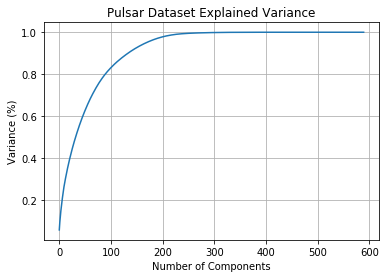

In [82]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.grid(True)
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

## Observations:
1. Number of components from 190-220 will have above 95% variance

## PCA implementation using sklearn for 7 components

In [83]:
principal_components = PCA(n_components=7).fit_transform(X_std)


In [84]:
principal_components =  pd.DataFrame(data = principal_components, columns = ['component_0', 'component_1', 'component_2', 
                                                                           'component3', 'component_4', 'component_5', 'component_6'])

In [85]:
principal_components

,component_0,component_1,component_2,component3,component_4,component_5,component_6
0,-1.694779,2.928302,3.889542,-2.585909,0.045042,-1.361095,-1.667570
1,-2.247254,0.878030,2.886159,-2.063688,-0.272492,-1.647111,-2.185614
2,0.442951,1.234729,1.143708,-0.376123,0.653563,2.069538,-2.164491
3,1.158902,5.105921,4.268514,-3.308162,2.479232,2.270682,-8.084758
4,0.754023,2.374252,2.554605,0.023017,1.980174,3.425408,-4.602520
5,2.076376,2.875848,3.570541,-2.226205,1.808009,3.534565,-2.425764
6,-1.747067,4.527047,2.858662,-1.442725,0.488382,-1.418948,-2.963916
7,1.292041,2.011718,4.728527,-2.374905,0.437326,1.421170,-2.404215
8,-0.471800,19.142499,-3.489476,3.588312,0.438937,2.551641,-0.632491
9,1.303151,4.006351,5.708799,-2.977084,1.059550,2.473407,-2.422952
